# Temperature Forecast Project using ML

Project Description

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


Attribute Information:

For more information, read [Cho et al, 2020].

1. station - used weather station number: 1 to 25

2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')

3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6

4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9

5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5

6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100

7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5

8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6

9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9


10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4

11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97

12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97


13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98

14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97

15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7

16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6

17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8

18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7

19. lat - Latitude (Â°): 37.456 to 37.645

20. lon - Longitude (Â°): 126.826 to 127.135

21. DEM - Elevation (m): 12.4 to 212.3

22. Slope - Slope (Â°): 0.1 to 5.2

23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9

24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9

25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.





In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [39]:
# Importing Data
df = pd.read_csv("temperature.csv")
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [40]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [41]:
# check data shape
df.shape

(7752, 25)

In [42]:
# chheck all varaibles names
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [43]:
# checking datatype of all columns
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [44]:
# checking empty spaces in dataset
for x in df.columns:
    print(df.loc[df[x]==" "])

Empty DataFrame
Columns: [station, Date, Present_Tmax, Present_Tmin, LDAPS_RHmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, lat, lon, DEM, Slope, Solar radiation, Next_Tmax, Next_Tmin]
Index: []

[0 rows x 25 columns]
Empty DataFrame
Columns: [station, Date, Present_Tmax, Present_Tmin, LDAPS_RHmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, lat, lon, DEM, Slope, Solar radiation, Next_Tmax, Next_Tmin]
Index: []

[0 rows x 25 columns]
Empty DataFrame
Columns: [station, Date, Present_Tmax, Present_Tmin, LDAPS_RHmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, lat, lon, DEM, Slope, Solar radiation, Next_Tmax, Next_Tmin]
Index: []

[0 rows x 2

There is No Empty Spaces in dataset

<AxesSubplot:>

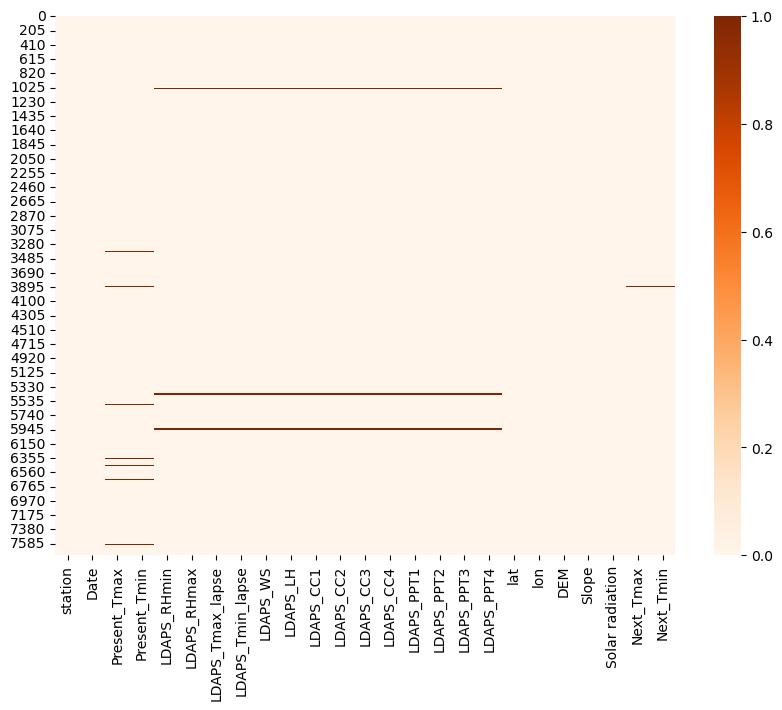

In [45]:
# checking null values using heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(), cmap = 'Oranges')

In [46]:
# Checking null values
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

NUll Values Present in the dataset

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [48]:
# check the duplicates
duplicate = df[df.duplicated()]
print("Duplicate  Rows : ")

duplicate

Duplicate  Rows : 


,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin


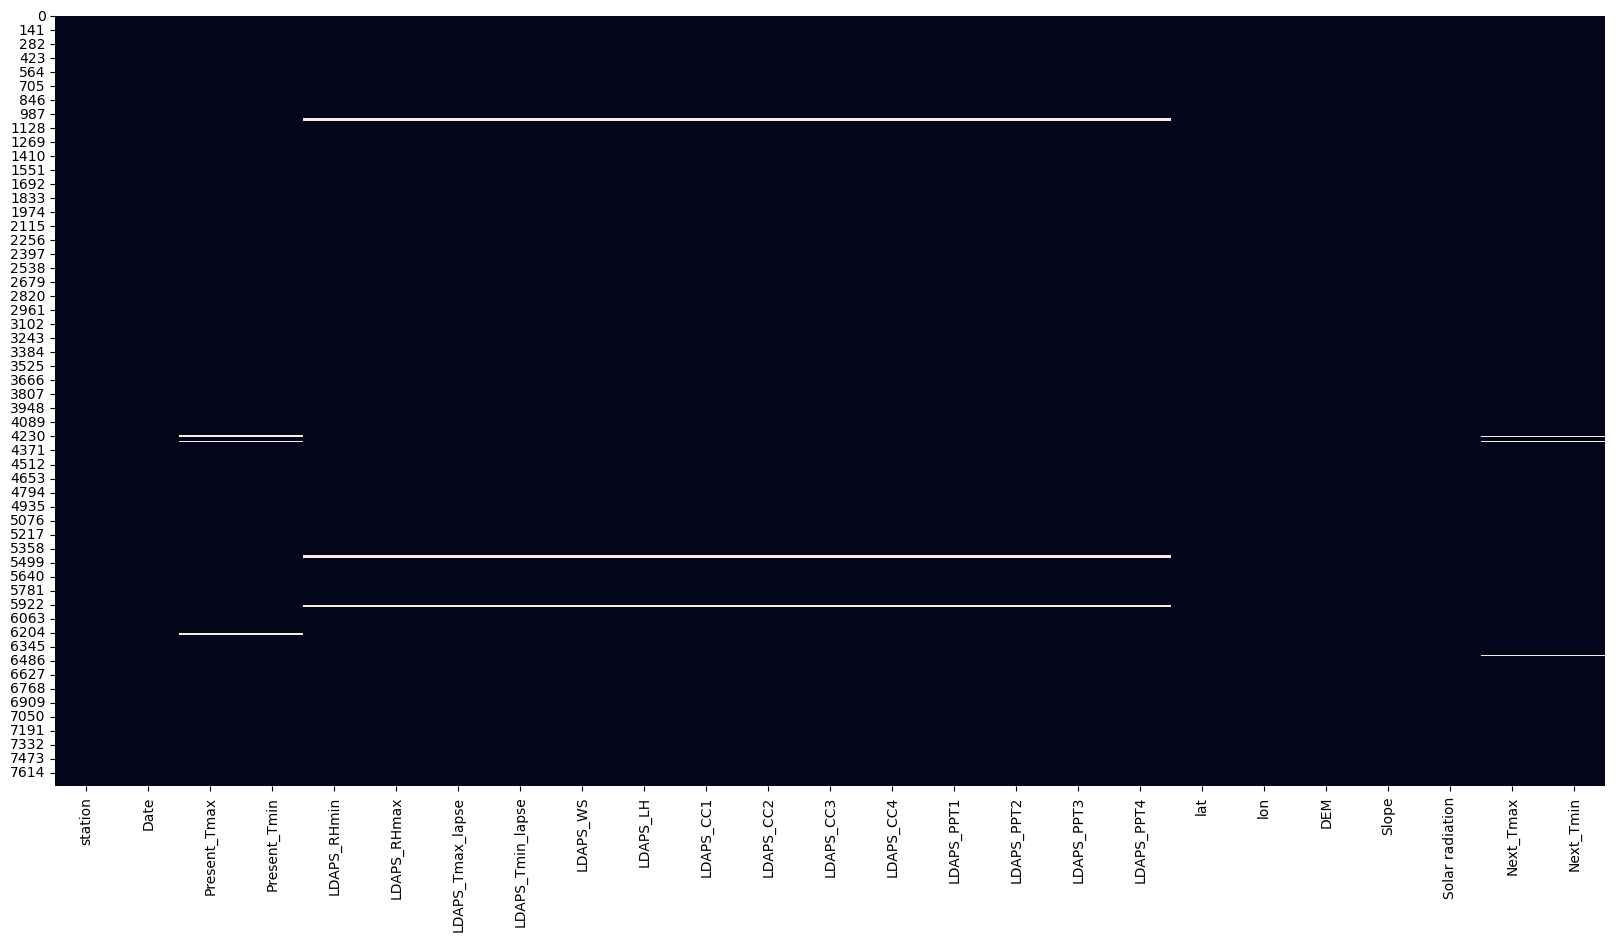

LDAPS_CC3           0.967492
LDAPS_PPT4          0.967492
LDAPS_PPT2          0.967492
LDAPS_PPT1          0.967492
LDAPS_CC4           0.967492
LDAPS_CC2           0.967492
LDAPS_CC1           0.967492
LDAPS_LH            0.967492
LDAPS_WS            0.967492
LDAPS_Tmin_lapse    0.967492
LDAPS_Tmax_lapse    0.967492
LDAPS_RHmax         0.967492
LDAPS_RHmin         0.967492
LDAPS_PPT3          0.967492
Present_Tmin        0.902993
Present_Tmax        0.902993
Next_Tmax           0.348297
Next_Tmin           0.348297
Date                0.025800
station             0.025800
lat                 0.000000
lon                 0.000000
DEM                 0.000000
Slope               0.000000
Solar radiation     0.000000
dtype: float64


In [49]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)
plt.show()
print((df.isna().sum()/df.shape[0]*100).sort_values(ascending=False))

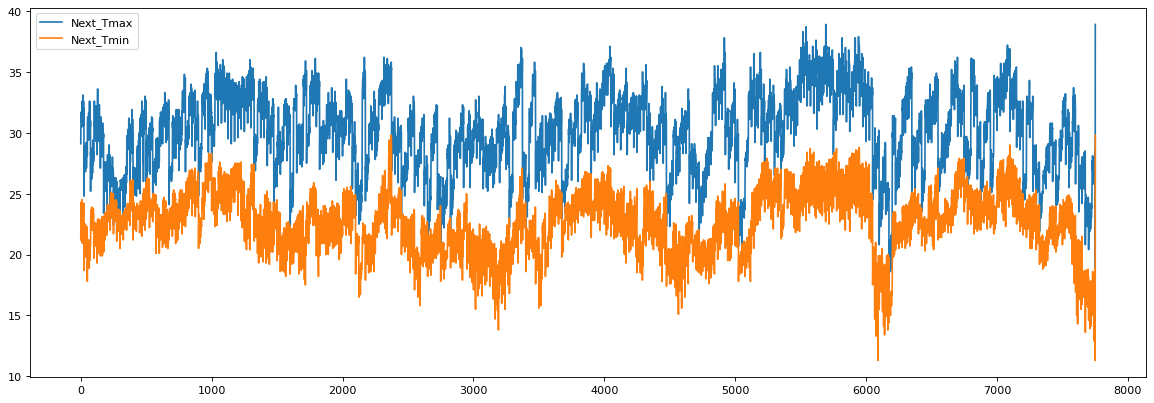

In [50]:
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(df["Next_Tmax"],label="Next_Tmax")
plt.plot(df["Next_Tmin"],label="Next_Tmin")
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

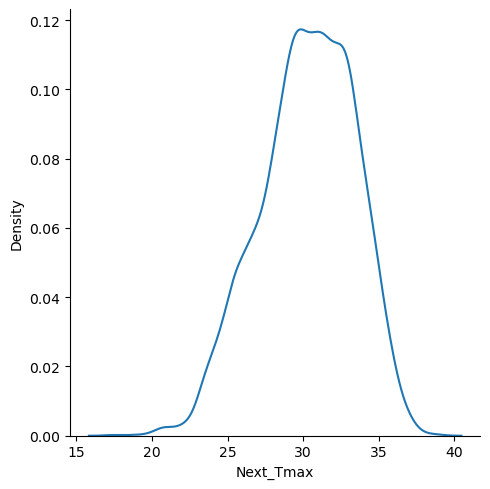

<Figure size 640x480 with 0 Axes>

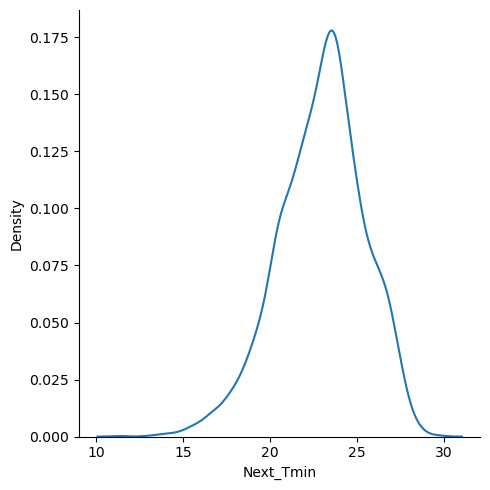

30.274886731391593
3.128010057855773
22.93222006472492
2.487612771331068


In [51]:
for col in ["Next_Tmax","Next_Tmin"]:
    plt.figure()
    sns.displot(df[col],kind='kde')
    plt.show()
print(df["Next_Tmax"].mean())
print(df["Next_Tmax"].std())
print(df["Next_Tmin"].mean())
print(df["Next_Tmin"].std())

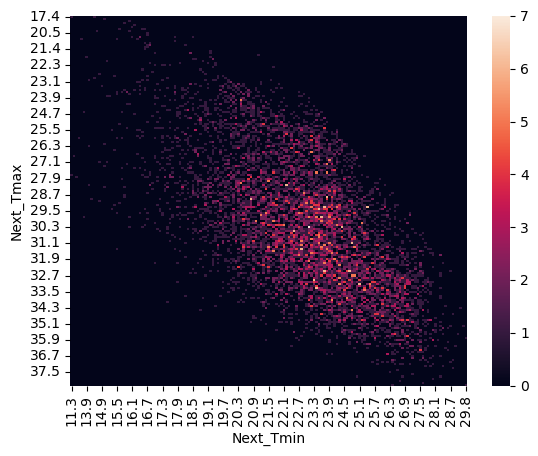

In [52]:
plt.figure()
sns.heatmap(pd.crosstab(df['Next_Tmax'],df['Next_Tmin']))
plt.show()

<AxesSubplot:>

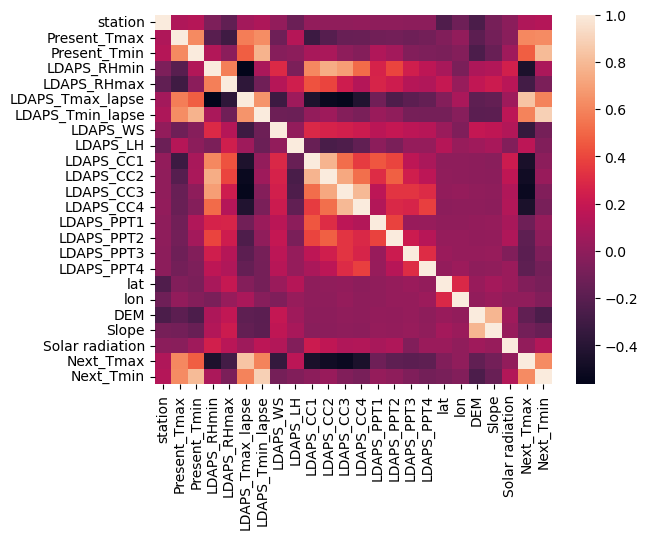

In [53]:
sns.heatmap(df.corr())

# Data preprocessing


# Aim :

. Deal  with NAN 

. Encode Qualitative features

. Develop our first modelling strategy

In [54]:
def feature_engineering(df):
    df = df.drop(["Date"],axis=1)
    print(df.dtypes.value_counts()) 
    return(df)

In [55]:
def imputation(df):
    #df = df.fillna(-999)
    df = df.dropna(axis=0)
    return df

In [56]:
def encodage(df):
    return df

In [57]:
def preprocessing(df):
    df = imputation(df)
    df = encodage(df)
    df = feature_engineering(df)
    
    X = df.drop(['Next_Tmax','Next_Tmin'],axis=1)
    y_max = df["Next_Tmax"]
    y_min = df["Next_Tmin"]
    
    print(X.shape)
    print(y_max.shape)
    
    return X,y_max,y_min

In [58]:
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [59]:
X_train, y_min_train, y_max_train = preprocessing(trainset)
X_test, y_min_test, y_max_test = preprocessing(testset)

float64    24
dtype: int64
(6068, 22)
(6068,)
float64    24
dtype: int64
(1520, 22)
(1520,)


# Modeling:

# Aim:

. Standarlise features
. Define a regresiion model
. Compute score and RMSE

# SGDRegressor

In [60]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_validate

In [61]:
reg_max = make_pipeline(StandardScaler(),
                    SGDRegressor(loss='squared_loss', penalty='l2', max_iter=1000, tol=1e-3))
reg_max.fit(X_train, y_max_train)

reg_min = make_pipeline(StandardScaler(),
                    SGDRegressor(loss='squared_loss', penalty='l2', max_iter=1000, tol=1e-3))
reg_min.fit(X_train, y_min_train)

cv_results_min = cross_validate(reg_min, X_train, y_min_train, cv=5, scoring=('r2', "neg_root_mean_squared_error"), return_train_score=True)
cv_results_max = cross_validate(reg_max, X_train, y_max_train, cv=5, scoring=('r2', "neg_root_mean_squared_error"), return_train_score=True)

print('For the  Next_Tmin :')
print('Test RMSE :' , -cv_results_min['test_neg_root_mean_squared_error'].mean())
print('Test r2 :' , cv_results_min['test_r2'].mean())
print("Train RMSE :" , -cv_results_min['train_neg_root_mean_squared_error'].mean())
print("Train r2 :" , cv_results_min['train_r2'].mean())
print("*------------------------------------------*")
print('For the Next_Tmax :')
print('Test RMSE :' , -cv_results_max['test_neg_root_mean_squared_error'].mean())
print('Test r2 :' , cv_results_max['test_r2'].mean())
print("Train RMSE :" , -cv_results_max['train_neg_root_mean_squared_error'].mean())
print("Train r2 :" , cv_results_max['train_r2'].mean())

For the  Next_Tmin :
Test RMSE : 1.473884018547224
Test r2 : 0.7746079799777068
Train RMSE : 1.4673629577831602
Train r2 : 0.7768645872060803
*------------------------------------------*
For the Next_Tmax :
Test RMSE : 1.010507707755728
Test r2 : 0.8334606811794455
Train RMSE : 1.005592145753058
Train r2 : 0.835563096943192


In [62]:
Next_Tmin_predict = reg_min.predict(X_test)
Next_Tmax_predict = reg_max.predict(X_test)

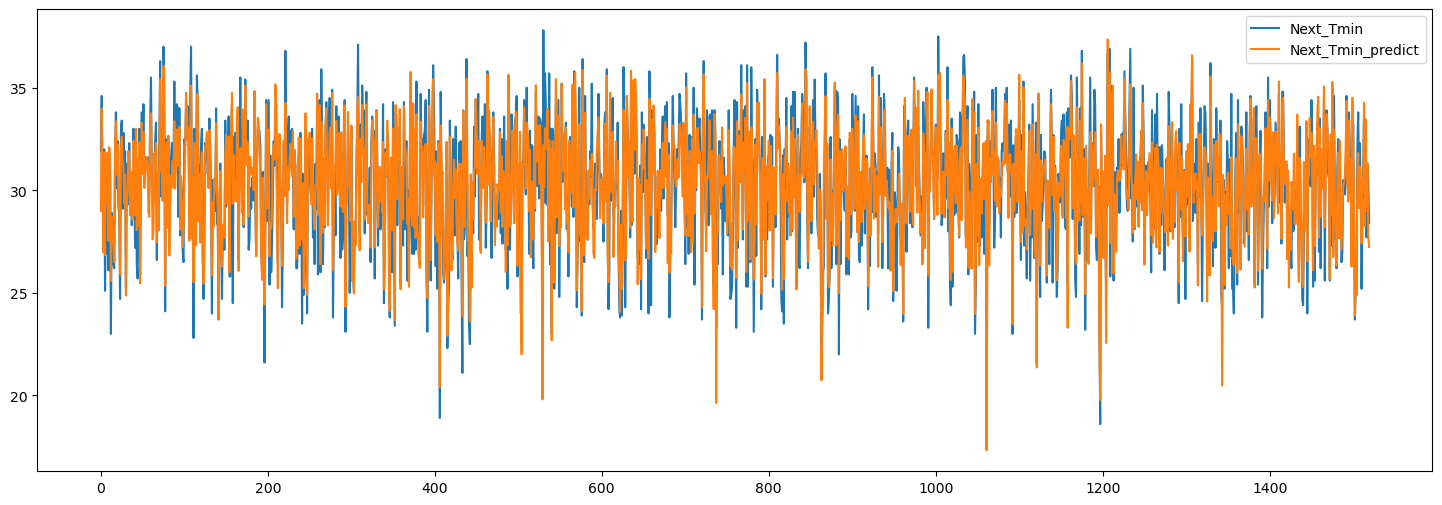

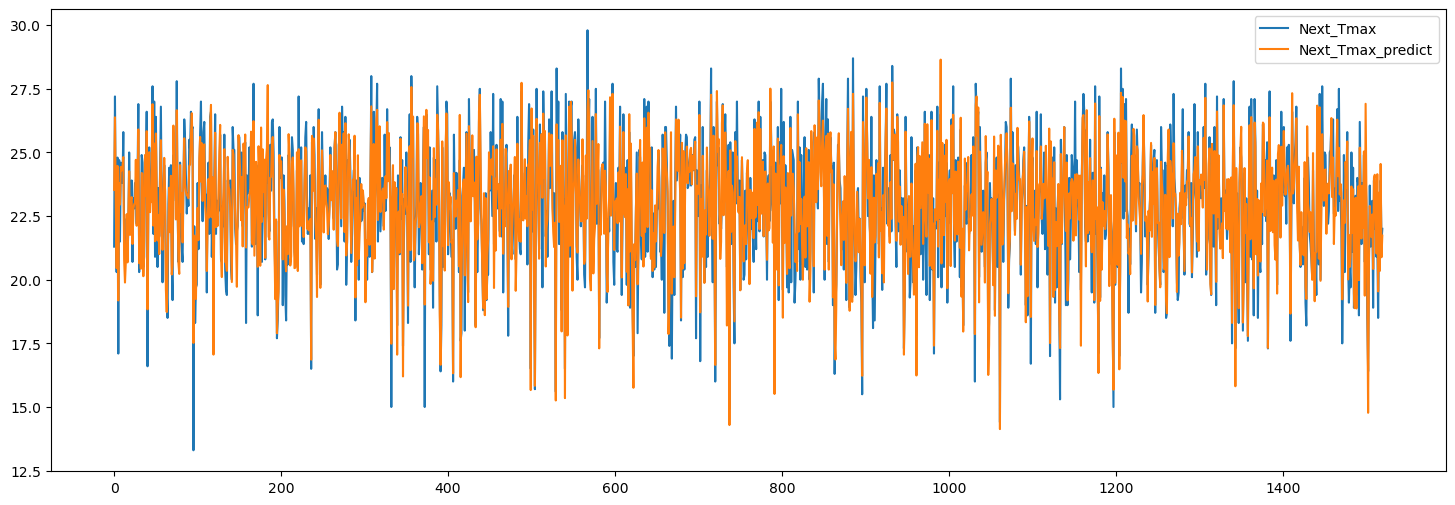

In [63]:
plt.figure(figsize=(18,6))
plt.plot(y_min_test.to_numpy(),label="Next_Tmin")
plt.plot(Next_Tmin_predict,label="Next_Tmin_predict")
plt.legend()
plt.show()

plt.figure(figsize=(18,6))
plt.plot(y_max_test.to_numpy(),label="Next_Tmax")
plt.plot(Next_Tmax_predict,label="Next_Tmax_predict")
plt.legend()
plt.show()

# RandomForest

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [70, 130],
    'max_features': [3, 6],
    'min_samples_leaf': [2, 3],
    'min_samples_split': [4, 8],
    'n_estimators': [1000, 500]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [65]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [66]:
# Fit the grid search to the Max data

grid_search.fit(X_train, y_max_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_max_test)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
{'bootstrap': True, 'max_depth': 70, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 1000}
Model Performance
Average Error: 0.5525 degrees.
Accuracy = 97.52%.


In [68]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_max_train)
base_accuracy = evaluate(base_model, X_test, y_max_test)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.6310 degrees.
Accuracy = 97.16%.
Improvement of 0.37%.


In [31]:
# Fit the grid search to the Min data

grid_search.fit(X_train, y_min_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_min_test)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
{'bootstrap': True, 'max_depth': 70, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 1000}
Model Performance
Average Error: 0.6876 degrees.
Accuracy = 97.69%.


In [32]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_min_train)
base_accuracy = evaluate(base_model, X_test, y_min_test)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.7870 degrees.
Accuracy = 97.36%.
Improvement of 0.34%.


In [33]:
Next_Tmax_TreeRegressor = RandomForestRegressor(random_state = 42, 
                                                bootstrap=True, max_depth=110, max_features=4, 
                                                min_samples_leaf=2, min_samples_split=4, n_estimators=900)
Next_Tmin_TreeRegressor = RandomForestRegressor(random_state = 42, 
                                                bootstrap=True, max_depth=70, max_features=6, 
                                                min_samples_leaf=2, min_samples_split=4, n_estimators=900)


print("---Next_Tmax---")
Next_Tmax_TreeRegressor.fit(X_train,y_max_train)
Next_Tmax_Accuracy = evaluate(Next_Tmax_TreeRegressor, X_test, y_max_test)

base_max_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_max_model.fit(X_train, y_max_train)
base_max_accuracy = evaluate(base_max_model, X_test, y_max_test)

print('Improvement of {:0.2f}%.'.format( 100 * (Next_Tmax_Accuracy - base_max_accuracy) / base_max_accuracy))
print("---------")


print("---Next_Tmin---")
Next_Tmin_TreeRegressor.fit(X_train,y_min_train)
Next_Tmin_Accuracy = evaluate(Next_Tmin_TreeRegressor, X_test, y_min_test)

base_min_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_min_model.fit(X_train, y_min_train)
base_min_accuracy = evaluate(base_min_model, X_test, y_min_test)

print('Improvement of {:0.2f}%.'.format( 100 * (Next_Tmin_Accuracy - base_min_accuracy) / base_min_accuracy))
print("---------")

---Next_Tmax---
Model Performance
Average Error: 0.5598 degrees.
Accuracy = 97.48%.
Model Performance
Average Error: 0.6310 degrees.
Accuracy = 97.16%.
Improvement of 0.33%.
---------
---Next_Tmin---
Model Performance
Average Error: 0.6888 degrees.
Accuracy = 97.69%.
Model Performance
Average Error: 0.7870 degrees.
Accuracy = 97.36%.
Improvement of 0.33%.
---------


# Conclusion

By using RandomForest, we can reach accuracies on both targets up to 97%